In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
data={
    "Area":[800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    "Bedrooms": [1,2,2,2,3,3,3,4,4,4],
    "Bathrooms": [1,1,2,2,2,2,3,3,3,3],
    "Age": [15,12,10,8,6,5,4,3,2,1],
    "Distance_City":[15,14,13,12,10,9,8,7,6,5],
    "Price":[40,50,55,60,70,75,80,90,95,100]
}
df=pd.DataFrame(data)

In [5]:
x=df.drop("Price",axis=1) #multiple columns
y=df["Price"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
linear=LinearRegression()
linear.fit(x_train_scaled,y_train)

LinearRegression()

In [9]:
ridge=Ridge(alpha=2.0)
ridge.fit(x_train_scaled,y_train)

Ridge(alpha=2.0)

In [11]:
y_train_pred_lin=linear.predict(x_train_scaled)
y_test_pred_lin=linear.predict(x_test_scaled)

In [12]:
train_mse_lin=mean_squared_error(y_train,y_train_pred_lin)
test_mse_lin=mean_squared_error(y_test,y_test_pred_lin)

print("Train  MSE:",train_mse_lin)
print("Test MSE:",test_mse_lin)

Train  MSE: 5.679798517591285e-29
Test MSE: 2.0194839173657902e-28


In [13]:
y_train_pred_lin=ridge.predict(x_train_scaled)
y_test_pred_lin=ridge.predict(x_test_scaled)

In [14]:
train_mse_lin=mean_squared_error(y_train,y_train_pred_lin)
test_mse_lin=mean_squared_error(y_test,y_test_pred_lin)

print("Train  MSE:",train_mse_lin)
print("Test MSE:",test_mse_lin)

Train  MSE: 2.72580460390538
Test MSE: 3.19803774145094


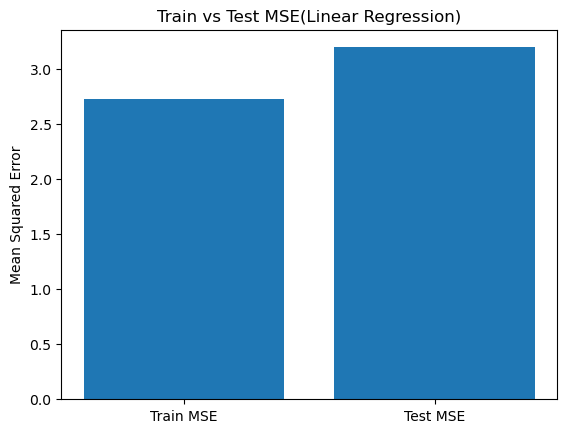

In [16]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lin,test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE(Linear Regression)")
plt.show()

In [ ]:
lasso regression

In [17]:
lasso=Lasso(alpha=0.5) # alpha=regularization
lasso.fit(x_train_scaled,y_train)

Lasso(alpha=0.5)

In [18]:
y_train_pred_lin=lasso.predict(x_train_scaled)
y_test_pred_lin=lasso.predict(x_test_scaled)

In [19]:
train_mse_lasso=mean_squared_error(y_train,y_train_pred_lin)
test_mse_lasso=mean_squared_error(y_test,y_test_pred_lin)

print("Train  MSE:",train_mse_lasso)
print("Test MSE:",test_mse_lasso)

Train  MSE: 0.2540521315349213
Test MSE: 0.35590211738900734


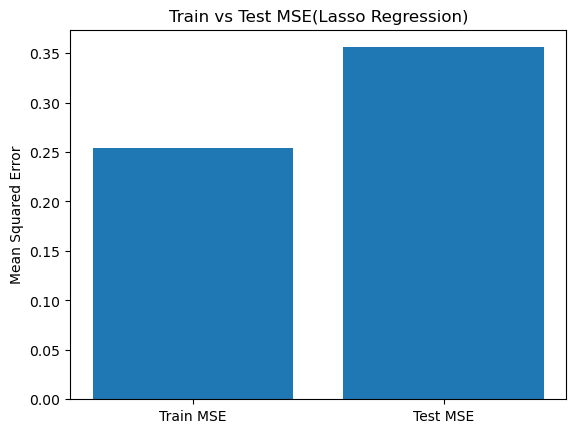

In [24]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lasso,test_mse_lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE(Lasso Regression)")
plt.show()

In [25]:
lasso_coefficients=pd.Series(lasso.coef_,index=x.columns)

print(lasso_coefficients)

Area             13.200626
Bedrooms          4.581169
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.013020
dtype: float64


In [27]:
x_plot=pd.DataFrame({
    "Area":np.linspace(df["Area"].min(),df["Area"].max(),100),
    "Bedrooms":df["Bedrooms"].mean(),
    "Bathrooms":df["Bathrooms"].mean(),
    "Age":df["Age"].mean(),
    "Distance_City":df["Distance_City"].mean()
})

In [ ]:
X_plot_scaled = scaler.transform(X_plot) 
y line = lasso.predict(X_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data") 
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()